In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
# load survey data
participant_info_df = pd.read_csv('strategy-identification+prolific_20+November+2024_16.12-participants.csv')
strategy_id_answers_df = pd.read_csv('strategy-identification+prolific_20+November+2024_16.12-strategy-id-answers.csv')
mechanism_overall_ratings_df = pd.read_csv('strategy-identification+prolific_20+November+2024_16.12-mechanism-overall-ratings.csv')

In [3]:
participant_info_df

,user_id,gender,age_group,education,ai_study,pacman_knowledge,time_taken,explanation_mechanism_order,final_thoughts
0,16,Female,18–24,High School,Yes,Have played and understand the game well,610,"('TemporalDecomposition', 'OptimalAction', 'SA...",NaN
1,18,Female,55–64,High School,No,Have played once or twice and have minimal kno...,507,"('TemporalDecomposition', 'DatasetSimilarity',...",NaN
2,20,Female,25–34,High School,No,Have played and understand the game well,680,"('OptimalAction', 'SARFA', 'TemporalDecomposit...",NaN
3,21,Female,35–44,Master's Degree,No,Have played and understand the game well,529,"('SARFA', 'TemporalDecomposition', 'DatasetSim...",NaN
4,22,Male,25–34,Bachelor's Degree,Yes,Have played and understand the game well,648,"('DatasetSimilarity', 'OptimalAction', 'SARFA'...",NaN
...,...,...,...,...,...,...,...,...,...
95,117,Female,25–34,Bachelor's Degree,No,Have played once or twice and have minimal kno...,454,"('SARFA', 'TemporalDecomposition', 'DatasetSim...",NaN
96,118,Male,25–34,Bachelor's Degree,Yes,Have played and understand the game well,1784,"('SARFA', 'TemporalDecomposition', 'OptimalAct...",NaN
97,119,Female,35–44,Bachelor's Degree,No,Have played and understand the game well,1058,"('DatasetSimilarity', 'TemporalDecomposition',...",NaN
98,121,Male,45–54,Bachelor's Degree,No,Have played and understand the game well,791,"('SARFA', 'TemporalDecomposition', 'DatasetSim...",NaN


In [4]:
strategy_id_answers_df

,user_id,obs_id,explanation_mechanism,true_strategy,predicted_strategy,is_correct,confidence,time_taken,survey_question_pos
0,16,15,DatasetSimilarity,EnergyPill,EnergyPill,True,Confident,11.485,14
1,16,8,DatasetSimilarity,Survival,Survival,True,Confident,13.320,12
2,16,16,DatasetSimilarity,Survival,EnergyPill,False,Very Confident,11.731,15
3,16,8,DatasetSimilarity,LoseALife,LoseALife,True,Neutral,22.399,13
4,16,11,TemporalDecomposition,Dots,Survival,False,Neutral,3.927,2
...,...,...,...,...,...,...,...,...,...
1595,122,15,SARFA,LoseALife,LoseALife,True,Very Confident,15.351,0
1596,122,7,OptimalAction,Dots,Dots,True,Confident,16.533,11
1597,122,1,OptimalAction,Survival,Survival,True,Very Confident,16.056,10
1598,122,10,OptimalAction,Survival,LoseALife,False,Confident,14.693,9


In [5]:
mechanism_overall_ratings_df

,user_id,explanation_mechanism,confidence,ease,understanding,additional_thoughts,survey_mechanism_pos
0,16,DatasetSimilarity,Neutral,Somewhat Easy,Neutral,NaN,3
1,16,TemporalDecomposition,Confident,Somewhat Easy,Mostly understood,NaN,0
2,16,SARFA,Unconfident,Somewhat Difficult,Understood very little,NaN,2
3,16,OptimalAction,Neutral,Somewhat Difficult,Neutral,NaN,1
4,18,DatasetSimilarity,Very Unconfident,Very Difficult,Did not understand at all,NaN,1
...,...,...,...,...,...,...,...
395,121,OptimalAction,Neutral,Somewhat Difficult,Mostly understood,NaN,3
396,122,DatasetSimilarity,Confident,Somewhat Easy,Completely understood,NaN,3
397,122,TemporalDecomposition,Confident,Somewhat Easy,Completely understood,NaN,1
398,122,SARFA,Confident,Somewhat Easy,Completely understood,NaN,0


In [6]:
sns.set_theme(style="darkgrid")
colours = sns.color_palette("pastel")

In [7]:
# Pretty the names for figures
strategy_id_answers_df["Explanation Mechanism"] = strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "TemporalDecomposition": "TRD Sum", "SARFA": "SARFA", "OptimalAction": "OAD"})
strategy_id_answers_df["Explanation Mechanism"] = strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "Dataset Similarity Explanation", "TemporalDecomposition": "TRD Summarisation", "SARFA": "SARFA", "OptimalAction": "Optimal Action Description"})
strategy_id_answers_df["Accuracy"] = strategy_id_answers_df["is_correct"]
strategy_id_answers_df["Agent Strategy"] = strategy_id_answers_df["true_strategy"].map({"Dots": "Eat Dots", "EnergyPill": "Eat EPaG", "LoseALife": "Lose a Life", "Survival": "Survival"})
strategy_id_answers_df["Predicted Strategy"] = strategy_id_answers_df["predicted_strategy"].map({"Dots": "Eat Dots", "EnergyPill": "Eat EPaG", "LoseALife": "Lose a Life", "Survival": "Survival"})

# What is the per explanation mechanisms and goal accuracy?

In [15]:
strategy_id_answers_df.groupby("user_id")["is_correct"].mean().describe()

count    100.000000
mean       0.349375
std        0.108105
min        0.062500
25%        0.250000
50%        0.375000
75%        0.437500
max        0.562500
Name: is_correct, dtype: float64

In [8]:
strategy_id_answers_df.groupby(by="explanation_mechanism")["is_correct"].mean().apply(lambda x: np.round(x*100, 1))

explanation_mechanism
DatasetSimilarity        53.2
OptimalAction            28.7
SARFA                    22.8
TemporalDecomposition    35.0
Name: is_correct, dtype: float64

In [9]:
strategy_id_answers_df.groupby(by=["explanation_mechanism", "true_strategy"])["is_correct"].mean()

explanation_mechanism  true_strategy
DatasetSimilarity      Dots             0.414141
                       EnergyPill       0.690000
                       LoseALife        0.445545
                       Survival         0.580000
OptimalAction          Dots             0.245098
                       EnergyPill       0.183673
                       LoseALife        0.260000
                       Survival         0.460000
SARFA                  Dots             0.264706
                       EnergyPill       0.212121
                       LoseALife        0.160000
                       Survival         0.272727
TemporalDecomposition  Dots             0.310000
                       EnergyPill       0.319588
                       LoseALife        0.504950
                       Survival         0.264706
Name: is_correct, dtype: float64

In [10]:
strategy_id_answers_df.groupby(by="true_strategy")["is_correct"].mean().apply(lambda x: np.round(x*100, 1))

true_strategy
Dots          30.8
EnergyPill    35.3
LoseALife     34.3
Survival      39.4
Name: is_correct, dtype: float64

In [11]:
strategy_id_answers_df.groupby(by="predicted_strategy").size().to_frame("count")

,count
predicted_strategy,
Dots,408
EnergyPill,426
LoseALife,311
Survival,455


# What is the per explanation-goal accuracy? With average goal accuracy

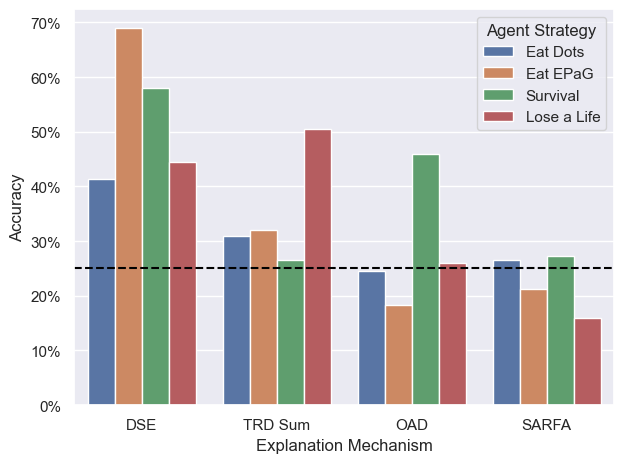

In [12]:
strategy_id_answers_df["Explanation Mechanism"] = strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "TemporalDecomposition": "TRD Sum", "SARFA": "SARFA", "OptimalAction": "OAD"})
ax = sns.barplot(data=strategy_id_answers_df.sort_values(["Explanation Mechanism", "Agent Strategy"], key=lambda x: x.map({"DSE": 1, "TRD Sum": 2, "OAD": 3, "SARFA": 4, "Eat Dots": 1, "Eat EPaG": 2, "Survival": 3, "Lose a Life": 4})), x="Explanation Mechanism", y="Accuracy", hue="Agent Strategy", errorbar=None)
ax.axhline(y=0.25, label="Random", linestyle="--", color="black")
ax.set_yticks(np.linspace(0, 0.7, 8), [f'{int(x)}%' for x in np.linspace(0, 70, 8)])
plt.tight_layout()
plt.savefig("figs/mechanism-goal-accuracy.png")
plt.savefig("figs/mechanism-goal-accuracy.pdf")

In [13]:
print(f'TRD Sum accuracy without Lose a Life={strategy_id_answers_df[(strategy_id_answers_df["Explanation Mechanism"] == "TRD Sum") & (strategy_id_answers_df["Agent Strategy"] != "Lose a Life")]["is_correct"].mean():.3f}')
print(f'TRD Sum accuracy for Lose a Life={strategy_id_answers_df[(strategy_id_answers_df["Explanation Mechanism"] == "TRD Sum") & (strategy_id_answers_df["Agent Strategy"] == "Lose a Life")]["is_correct"].mean():.3f}')
print(f'OAD accuracy without Lose a Life={strategy_id_answers_df[(strategy_id_answers_df["Explanation Mechanism"] == "OAD") & (strategy_id_answers_df["Agent Strategy"] != "Survival")]["is_correct"].mean():.3f}')
print(f'OAD accuracy without Lose a Life={strategy_id_answers_df[(strategy_id_answers_df["Explanation Mechanism"] == "OAD") & (strategy_id_answers_df["Agent Strategy"] == "Survival")]["is_correct"].mean():.3f}')

TRD Sum accuracy without Lose a Life=0.298
TRD Sum accuracy for Lose a Life=0.505
OAD accuracy without Lose a Life=0.230
OAD accuracy without Lose a Life=0.460


In [14]:
strategy_id_answers_df

,user_id,obs_id,explanation_mechanism,true_strategy,predicted_strategy,is_correct,confidence,time_taken,survey_question_pos,Explanation Mechanism,Accuracy,Agent Strategy,Predicted Strategy
0,16,15,DatasetSimilarity,EnergyPill,EnergyPill,True,Confident,11.485,14,DSE,True,Eat EPaG,Eat EPaG
1,16,8,DatasetSimilarity,Survival,Survival,True,Confident,13.320,12,DSE,True,Survival,Survival
2,16,16,DatasetSimilarity,Survival,EnergyPill,False,Very Confident,11.731,15,DSE,False,Survival,Eat EPaG
3,16,8,DatasetSimilarity,LoseALife,LoseALife,True,Neutral,22.399,13,DSE,True,Lose a Life,Lose a Life
4,16,11,TemporalDecomposition,Dots,Survival,False,Neutral,3.927,2,TRD Sum,False,Eat Dots,Survival
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,122,15,SARFA,LoseALife,LoseALife,True,Very Confident,15.351,0,SARFA,True,Lose a Life,Lose a Life
1596,122,7,OptimalAction,Dots,Dots,True,Confident,16.533,11,OAD,True,Eat Dots,Eat Dots
1597,122,1,OptimalAction,Survival,Survival,True,Very Confident,16.056,10,OAD,True,Survival,Survival
1598,122,10,OptimalAction,Survival,LoseALife,False,Confident,14.693,9,OAD,False,Survival,Lose a Life


In [15]:
strategy_id_answers_df.groupby(["Explanation Mechanism", "Agent Strategy"])["Accuracy"].mean().round(3).to_frame().reset_index().pivot(index="Explanation Mechanism", columns="Agent Strategy", values="Accuracy")

Agent Strategy,Eat Dots,Eat EPaG,Lose a Life,Survival
Explanation Mechanism,,,,
DSE,0.414,0.690,0.446,0.580
OAD,0.245,0.184,0.260,0.460
SARFA,0.265,0.212,0.160,0.273
TRD Sum,0.310,0.320,0.505,0.265


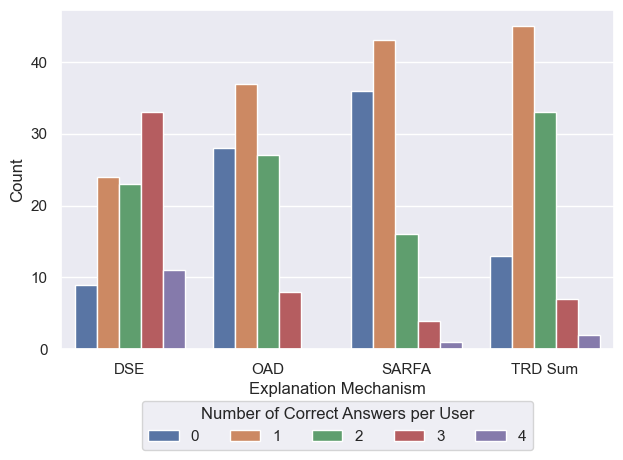

In [16]:
ax = sns.barplot(strategy_id_answers_df.groupby(["Explanation Mechanism", "user_id"])["is_correct"].sum().to_frame("Correct Answers").groupby(["Explanation Mechanism", "Correct Answers"]).size().to_frame("Count").reset_index(), x="Explanation Mechanism", y="Count", hue="Correct Answers")
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, -0.13), title="Number of Correct Answers per User", ncol=5)
plt.tight_layout()
plt.savefig(f'figs/mechanism-user-correct.png')
plt.savefig(f'figs/mechanism-user-correct.pdf')

In [17]:
for mechanism, results in strategy_id_answers_df.groupby(["Explanation Mechanism", "user_id"])["is_correct"].sum().to_frame("Correct Answers").groupby("Explanation Mechanism"):
    user_correct_answers = np.sort(results["Correct Answers"].values)
    # print(f'{mechanism=}, {user_correct_answers=}')
    
    n=4
    p=0.25
    
    test_stats_025, p_value_025 = stats.ks_1samp(user_correct_answers, lambda x: stats.binom.cdf(x, n, p))
    mle_p = np.mean(user_correct_answers) / n
    test_stats_mle, p_value_mle = stats.ks_1samp(user_correct_answers, lambda x: stats.binom.cdf(x, n, mle_p))
    
    print(f'{mechanism: >30}, '
          f'p-value for 0.25={p_value_025:.3f} ({test_stats_025:.3f}), '
          f'p-value for {mle_p:.3f}={p_value_mle:.3f} ({test_stats_mle:.3f})')

                           DSE, p-value for 0.25=0.000 (0.648), p-value for 0.532=0.000 (0.360)
                           OAD, p-value for 0.25=0.000 (0.458), p-value for 0.287=0.000 (0.394)
                         SARFA, p-value for 0.25=0.000 (0.378), p-value for 0.228=0.000 (0.416)
                       TRD Sum, p-value for 0.25=0.000 (0.608), p-value for 0.350=0.000 (0.433)


In [18]:
strategy_id_answers_df.groupby(["Explanation Mechanism", "user_id"])["is_correct"].sum().to_frame("Correct Answers").groupby(["Explanation Mechanism", "Correct Answers"]).size().to_frame("Count").reset_index().pivot_table(index="Explanation Mechanism", columns="Correct Answers", values="Count", fill_value=0)

Correct Answers,0,1,2,3,4
Explanation Mechanism,,,,,
DSE,9,24,23,33,11
OAD,28,37,27,8,0
SARFA,36,43,16,4,1
TRD Sum,13,45,33,7,2


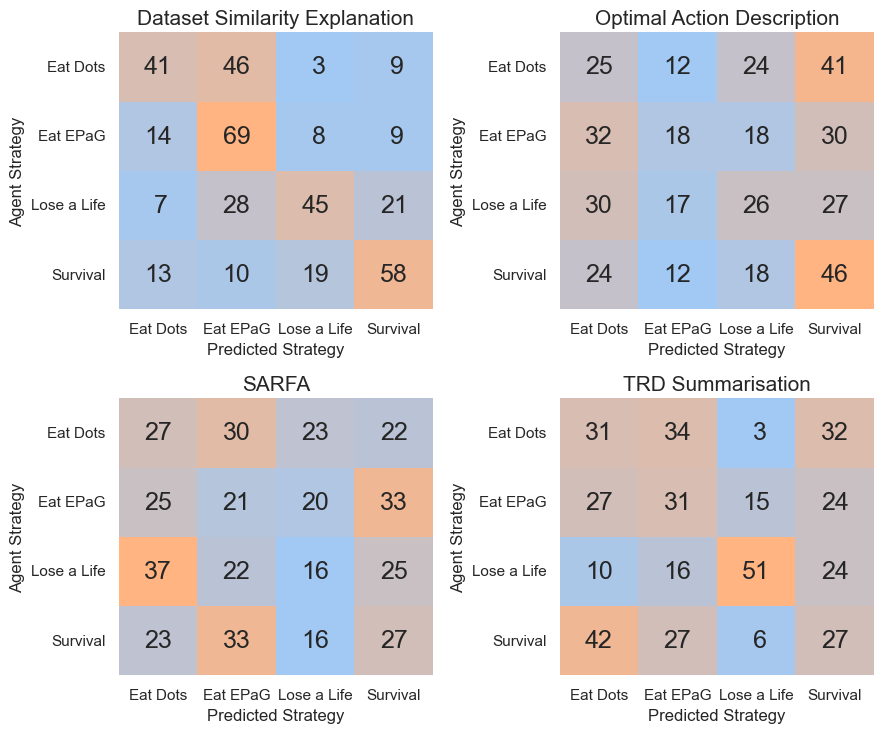

In [55]:
strategy_id_answers_df["Explanation Mechanism"] = strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "Dataset Similarity Explanation", "TemporalDecomposition": "TRD Summarisation", "SARFA": "SARFA", "OptimalAction": "Optimal Action Description"})
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("Custom", sns.color_palette("pastel")[:2], N=20)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 7.5))
for ax, (mechanism, mechanism_df) in zip(axs.flatten(), strategy_id_answers_df.groupby("Explanation Mechanism")):
    sns.heatmap(mechanism_df.groupby(by=["Agent Strategy", "Predicted Strategy"]).size().to_frame("Count")
                .reset_index(level=[0, 1]).pivot(index="Agent Strategy", columns="Predicted Strategy", values="Count"), 
            ax=ax, annot=True, annot_kws={"size": 18}, fmt="2d", cmap=cmap, cbar=False)
    ax.set_title(mechanism, fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
plt.tight_layout()
plt.savefig('figs/mechanism-confusion-matrix.png')
plt.savefig('figs/mechanism-confusion-matrix.pdf')

In [56]:
strategy_id_answers_df.groupby(["Explanation Mechanism", "Predicted Strategy"]).size().to_frame("Count").reset_index().pivot(index="Explanation Mechanism", columns="Predicted Strategy", values="Count")

Predicted Strategy,Eat Dots,Eat EPaG,Lose a Life,Survival
Explanation Mechanism,,,,
Dataset Similarity Explanation,75,153,75,97
Optimal Action Description,111,59,86,144
SARFA,112,106,75,107
TRD Summarisation,110,108,75,107


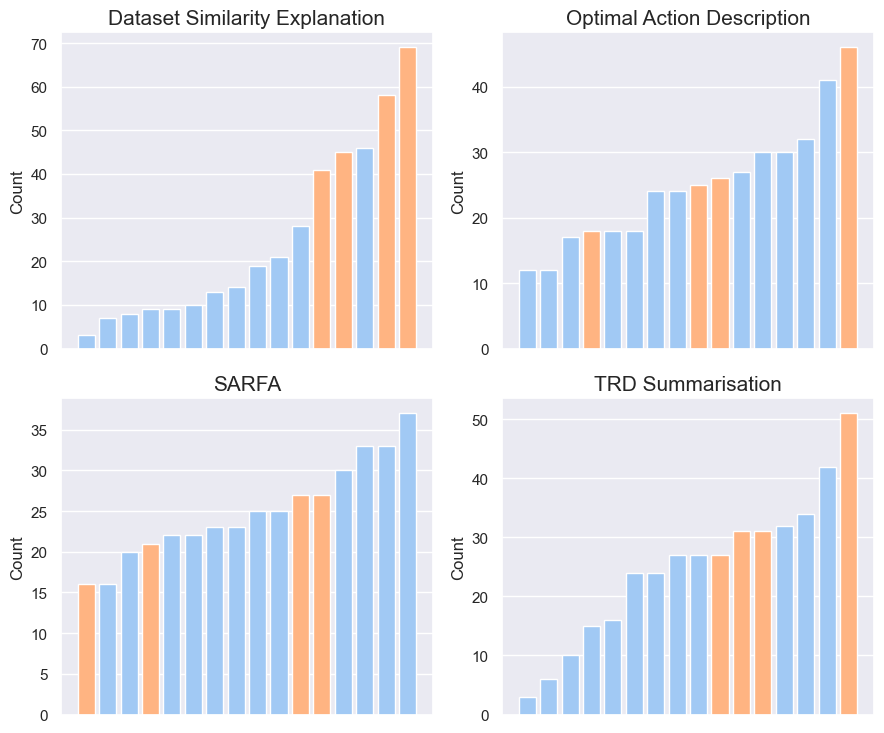

In [58]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 7.5))
for ax, (mechanism, mechanism_df) in zip(axs.flatten(), strategy_id_answers_df.groupby("Explanation Mechanism")):
    df = mechanism_df.groupby(["Agent Strategy", "Predicted Strategy"]).size().to_frame("Count").reset_index().sort_values("Count")
    
    ax.bar(np.arange(16), np.sort(df["Count"].values), color=np.array(colours)[(df["Agent Strategy"] == df["Predicted Strategy"]).values.astype(int)])
    ax.set_title(mechanism, fontsize=15)
    ax.set_ylabel("Count")
    ax.set_xticks([])
plt.tight_layout()
plt.savefig('figs/mechanism-confusion-bar.png')
plt.savefig('figs/mechanism-confusion-bar.pdf')

# What is the per observation accuracy? 

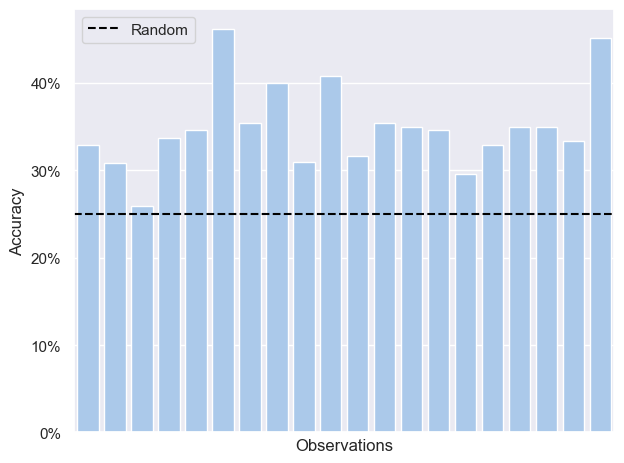

In [21]:
strategy_id_answers_df["obs_source"] = strategy_id_answers_df["obs_id"] // 4
ax = sns.barplot(data=strategy_id_answers_df, x="obs_id", y="Accuracy", errorbar=None, palette=colours[:1])
ax.axhline(0.25, linestyle="--", color="black", label="Random")
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4], ["0%", "10%", "20%", "30%", "40%"])
ax.set_xlabel("Observations")
ax.set_xticks([])
ax.legend()
plt.tight_layout()
plt.savefig('figs/obs-accuracy.png')
plt.savefig('figs/obs-accuracy.pdf')

In [22]:
strategy_id_answers_df["obs_source_strategy"] = (strategy_id_answers_df["obs_id"] // 4).map({1: "Eat Dots", 2: "Eat EPaG", 3: "Survival", 4: "Lose a Life"})
strategy_id_answers_df.groupby(["obs_source_strategy", "true_strategy"])["Accuracy"].mean().reset_index().pivot(index="obs_source_strategy", columns="true_strategy", values="Accuracy")

true_strategy,Dots,EnergyPill,LoseALife,Survival
obs_source_strategy,,,,
Eat Dots,0.375000,0.381579,0.303797,0.500000
Eat EPaG,0.246914,0.358025,0.417722,0.365854
Lose a Life,0.387500,0.425000,0.365854,0.307692
Survival,0.271605,0.320513,0.365854,0.362500


# Observation-goal accuracy

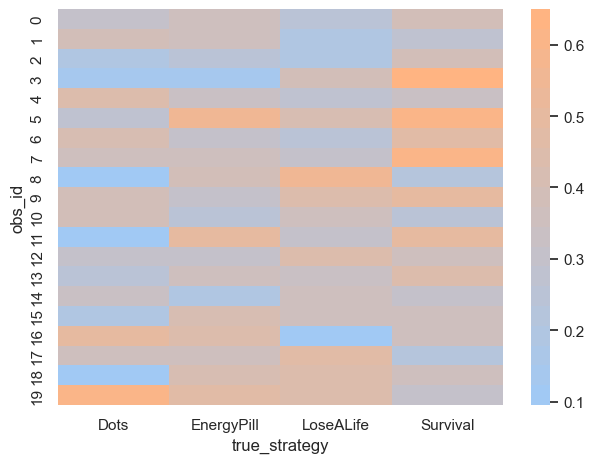

In [23]:
sns.heatmap(strategy_id_answers_df.groupby(["obs_id", "true_strategy"])["is_correct"].mean().to_frame("is_correct").reset_index().pivot(index="obs_id", columns="true_strategy", values="is_correct"), cmap=cmap)
plt.tight_layout()
plt.savefig('figs/obs-goal-accuracy.png')
plt.savefig('figs/obs-goal-accuracy.pdf')

# What is the per user accuracy? 

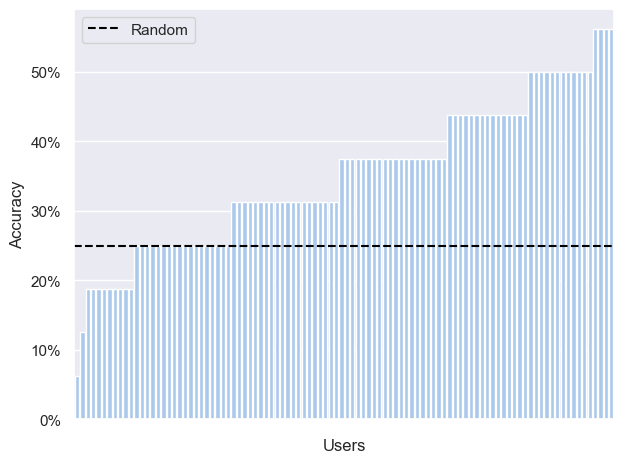

In [24]:
plot_order = strategy_id_answers_df.groupby(by="user_id")["Accuracy"].mean().sort_values(ascending=True).index.values
ax = sns.barplot(data=strategy_id_answers_df, x="user_id", y="Accuracy", errorbar=None, order=plot_order, palette=colours[:1])
ax.set(xlabel="Users", xticklabels=[])
ax.axhline(0.25, linestyle='--', color="black", label="Random")
ax.set_yticks(np.linspace(0, 0.5, 6), ["0%", "10%", "20%", "30%", "40%", "50%"])
ax.legend()
plt.tight_layout()
plt.savefig('figs/user-accuracy.png')
plt.savefig('figs/user-accuracy.pdf')

# Does user characteristics influence performance?

In [25]:
characteristic_order = [
    ['18–24', '25–34', '35–44', '45–54', '55–64', '65 and older'],
    ['High School', "Bachelor's Degree", "Master's Degree", 'Doctorate or Professional Degree (e.g., PhD, MD, JD)'],
    ["No", "Yes"],
    ['Never played and have no idea how the game works', 'Have played once or twice and have minimal knowledge of the game', 'Have played and understand the game well'],
    ["Female", "Male", "Prefer not to say"]
]

In [83]:
df = pd.merge(strategy_id_answers_df, participant_info_df[["user_id", "age_group"]], on="user_id").groupby("age_group").agg({"user_id": "nunique", "is_correct": "mean", "time_taken": "mean"}).sort_values(by="age_group", key=lambda x: x.map(dict(zip(characteristic_order[0], range(1, len(characteristic_order[0])+1)))))
df["is_correct"] = (df["is_correct"] * 100).round(1)
df["time_taken"] = df["time_taken"].round(1)
df

,user_id,is_correct,time_taken
age_group,,,
18–24,16,39.1,21.2
25–34,30,33.1,20.3
35–44,27,39.1,22.5
45–54,15,30.8,21.5
55–64,8,27.3,20.2
65 and older,4,34.4,18.2


In [84]:
df = pd.merge(strategy_id_answers_df, participant_info_df[["user_id", "education"]], on="user_id").groupby("education").agg({"user_id": "nunique", "is_correct": "mean", "time_taken": "mean"}).sort_values(by="education", key=lambda x: x.map(dict(zip(characteristic_order[1], range(1, len(characteristic_order[1])+1)))))
df["is_correct"] = (df["is_correct"] * 100).round(1)
df["time_taken"] = df["time_taken"].round(1)
df

,user_id,is_correct,time_taken
education,,,
High School,31,35.3,20.0
Bachelor's Degree,49,35.3,21.0
Master's Degree,17,33.8,22.8
"Doctorate or Professional Degree (e.g., PhD, MD, JD)",3,31.2,26.0


In [85]:
df = pd.merge(strategy_id_answers_df, participant_info_df[["user_id", "ai_study"]], on="user_id").groupby("ai_study").agg({"user_id": "nunique", "is_correct": "mean", "time_taken": "mean"}).sort_values(by="ai_study", key=lambda x: x.map(dict(zip(characteristic_order[2], range(1, len(characteristic_order[2])+1)))))
df["is_correct"] = (df["is_correct"] * 100).round(1)
df["time_taken"] = df["time_taken"].round(1)
df

,user_id,is_correct,time_taken
ai_study,,,
No,61,36.2,20.0
Yes,39,33.0,22.9


In [86]:
df = pd.merge(strategy_id_answers_df, participant_info_df[["user_id", "pacman_knowledge"]], on="user_id").groupby("pacman_knowledge").agg({"user_id": "nunique", "is_correct": "mean", "time_taken": "mean"}).sort_values(by="pacman_knowledge", key=lambda x: x.map(dict(zip(characteristic_order[3], range(1, len(characteristic_order[3])+1)))))
df["is_correct"] = (df["is_correct"] * 100).round(1)
df["time_taken"] = df["time_taken"].round(1)
df

,user_id,is_correct,time_taken
pacman_knowledge,,,
Have played and understand the game well,51,34.6,20.1
Have played once or twice and have minimal knowledge of the game,46,35.6,22.2
Never played and have no idea how the game works,3,31.2,23.6


In [30]:
pd.merge(strategy_id_answers_df, participant_info_df[["user_id", "gender"]], on="user_id").groupby("gender").agg({"user_id": "nunique", "is_correct": "mean", "time_taken": "mean"}).sort_values(by="gender", key=lambda x: x.map(dict(zip(characteristic_order[4], range(1, len(characteristic_order[4])+1)))))

,user_id,is_correct,time_taken
gender,,,
Female,57,0.331140,19.832602
Male,42,0.372024,22.869417
Non-binary / other,1,0.437500,22.709937


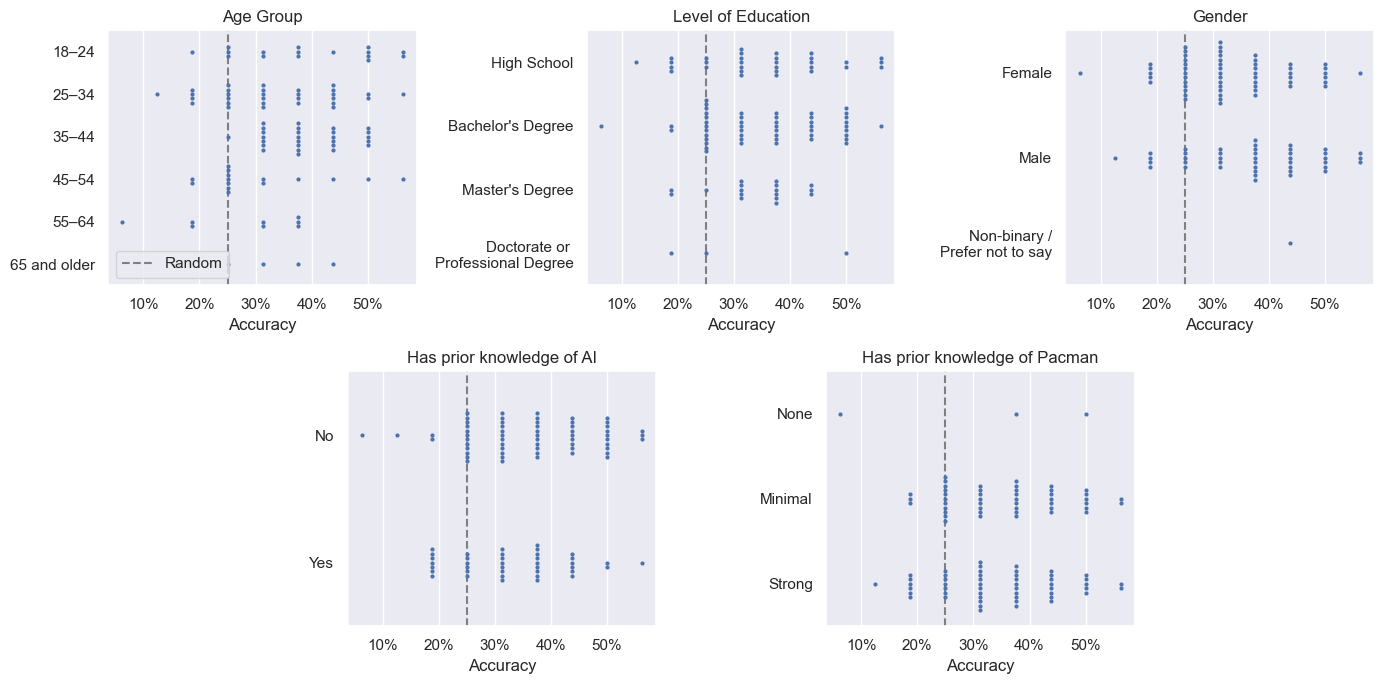

In [31]:
def centered_subplots(rows, figsize):
    grid_dim = max(rows)
    grid_shape = (len(rows), 2 * grid_dim)

    centred_fig = plt.figure(figsize=figsize)
    centred_axs = []
    for j, row in enumerate(rows):
        offset = 0
        for i in range(row):
            if row < grid_dim:
                offset = grid_dim - row

            centred_axs.append(plt.subplot2grid(grid_shape, (j, 2 * i + offset), fig=centred_fig, colspan=2))

    return centred_axs

participant_info_df["Age Group"] = participant_info_df["age_group"]
participant_info_df["Level of Education"] = participant_info_df["education"].map({'High School': 'High School', "Bachelor's Degree": "Bachelor's Degree", "Master's Degree": "Master's Degree", 'Doctorate or Professional Degree (e.g., PhD, MD, JD)': "Doctorate or \nProfessional Degree"})
participant_info_df["Gender"] = participant_info_df["gender"].map({"Female": "Female", "Male": "Male", "Non-binary / other": "Non-binary /\nPrefer not to say"})
participant_info_df["Has prior knowledge of AI"] = participant_info_df["ai_study"]
participant_info_df["Has prior knowledge of Pacman"] = participant_info_df["pacman_knowledge"].map({'Never played and have no idea how the game works': 'None', 'Have played once or twice and have minimal knowledge of the game': 'Minimal', 'Have played and understand the game well': 'Strong'})

characteristic_order = [
    ['18–24', '25–34', '35–44', '45–54', '55–64', '65 and older'],
    ['High School', "Bachelor's Degree", "Master's Degree", 'Doctorate or \nProfessional Degree'],
    ["Female", "Male", "Non-binary /\nPrefer not to say"],
    ["No", "Yes"],
    ['None', 'Minimal', 'Strong'],
]

axs = centered_subplots([3, 2], figsize=(14, 7))
for ax, characteristic, order in zip(axs, ["Age Group", "Level of Education", "Gender", "Has prior knowledge of AI", "Has prior knowledge of Pacman"], characteristic_order):
    ax = sns.swarmplot(data=pd.merge(strategy_id_answers_df, participant_info_df[["user_id", characteristic]], on="user_id").groupby(["user_id", characteristic])["is_correct"].mean().to_frame("Accuracy").sort_values(characteristic, key=lambda x: x.map(dict(zip(order, range(1, len(order)+1))))), y=characteristic, x="Accuracy", ax=ax, size=3)
    ax.set_xticks(np.linspace(0.1, 0.5, 5), ["10%", "20%", "30%", "40%", "50%"])
    ax.set_title(characteristic)
    ax.set_ylabel("")
    ax.axvline(0.25, linestyle="--", color="gray", label="Random")
axs[0].legend(loc="lower left")
plt.tight_layout()
plt.savefig('figs/participant-characteristic.png')
plt.savefig('figs/participant-characteristic.pdf')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.merge(participant_info_df, strategy_id_answers_df.groupby("user_id")["is_correct"].mean().to_frame("Accuracy").reset_index(), on="user_id", how="left")
char_cols = ["age_group", "gender", "education", "pacman_knowledge", "ai_study"]

encoder = ColumnTransformer(transformers=[("categorical", OneHotEncoder(), char_cols)], remainder='passthrough')
characteristic_encoded = encoder.fit_transform(df[char_cols]).toarray()

model = LinearRegression().fit(characteristic_encoded, df["Accuracy"].values)
print(f'score: {model.score(characteristic_encoded, df["Accuracy"].values)}')
pd.DataFrame(list(zip(encoder.get_feature_names_out(char_cols), np.round(model.coef_, 3))), columns=["Characteristics", "Coefficient"])

score: 0.22998093340408943


,Characteristics,Coefficient
0,categorical__age_group_18–24,0.057
1,categorical__age_group_25–34,-0.012
2,categorical__age_group_35–44,0.046
3,categorical__age_group_45–54,-0.031
4,categorical__age_group_55–64,-0.074
5,categorical__age_group_65 and older,0.014
6,categorical__gender_Female,-0.060
7,categorical__gender_Male,-0.003
8,categorical__gender_Non-binary / other,0.063
9,categorical__education_Bachelor's Degree,-0.001


In [33]:
import statsmodels.api as sm

model = sm.OLS(df["Accuracy"].values, sm.add_constant(characteristic_encoded)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1.976
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0324
Time:                        14:37:12   Log-Likelihood:                 94.140
No. Observations:                 100   AIC:                            -160.3
Df Residuals:                      86   BIC:                            -123.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1394      0.017      8.143      0.0

In [34]:
_, s, _ = np.linalg.svd(characteristic_encoded)
np.round(s, 4)

array([14.5375,  8.2479,  6.9039,  6.0625,  5.8411,  5.2343,  4.9922,
        3.9003,  3.6527,  2.9517,  2.0755,  1.9188,  1.8095,  1.1169,
        0.    ,  0.    ,  0.    ,  0.    ])

In [35]:
arr = characteristic_encoded
print(f'{arr.shape=}')
n_cols = len(encoder.get_feature_names_out(char_cols))
for i, col in enumerate(encoder.get_feature_names_out(char_cols)):
    r_squared_i = sm.OLS(df["Accuracy"].values, arr[:, np.arange(n_cols) != i]).fit().rsquared
    vif = 1. / (1. - r_squared_i)
    print(f'{col=}, {r_squared_i=}, {vif=}')

arr.shape=(100, 18)
col='categorical__age_group_18–24', r_squared_i=0.2299809334040891, vif=1.29866914129904
col='categorical__age_group_25–34', r_squared_i=0.22998093340408932, vif=1.2986691412990405
col='categorical__age_group_35–44', r_squared_i=0.22998093340408932, vif=1.2986691412990405
col='categorical__age_group_45–54', r_squared_i=0.22998093340408932, vif=1.2986691412990405
col='categorical__age_group_55–64', r_squared_i=0.22998093340408943, vif=1.2986691412990408
col='categorical__age_group_65 and older', r_squared_i=0.22998093340408932, vif=1.2986691412990405
col='categorical__gender_Female', r_squared_i=0.22998093340408932, vif=1.2986691412990405
col='categorical__gender_Male', r_squared_i=0.2299809334040892, vif=1.2986691412990403
col='categorical__gender_Non-binary / other', r_squared_i=0.2299809334040892, vif=1.2986691412990403
col="categorical__education_Bachelor's Degree", r_squared_i=0.2299809334040892, vif=1.2986691412990403
col='categorical__education_Doctorate or Pr

## Does the time taken to answer questions affect accuracy? 

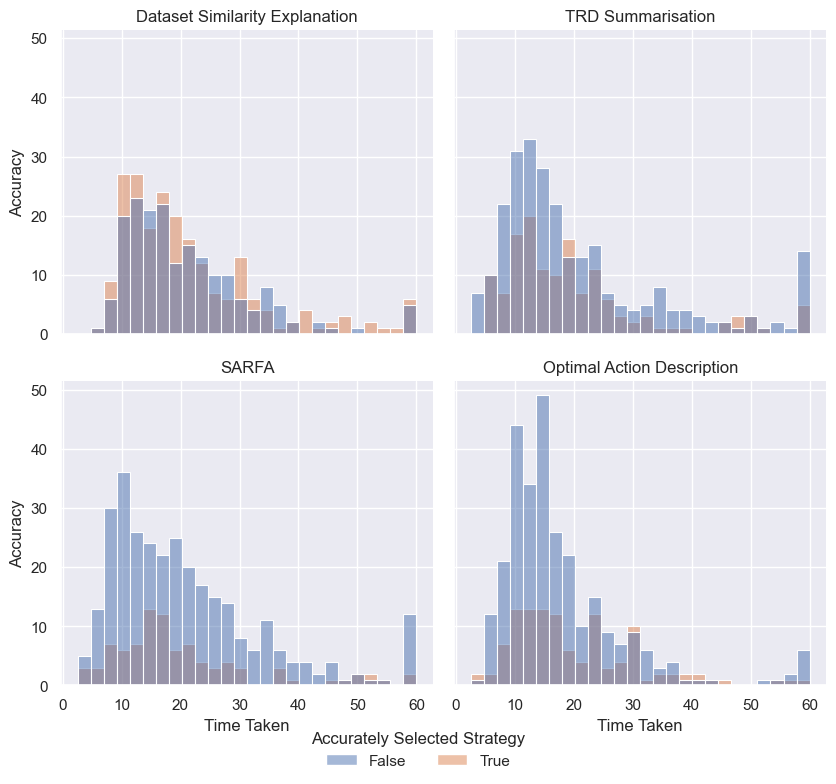

In [11]:
strategy_id_answers_df["Time Taken"] = strategy_id_answers_df["time_taken"].clip(upper=60)
strategy_id_answers_df["Explanation Mechanism"] = strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "Dataset Similarity Explanation", "TemporalDecomposition": "TRD Summarisation", "SARFA": "SARFA", "OptimalAction": "Optimal Action Description"})
ax = sns.displot(data=strategy_id_answers_df, x="Time Taken", hue="Accuracy", kind="hist", multiple="layer", col="Explanation Mechanism", col_wrap=2, height=3.8)  # multiple="layer" vs multiple="stack"
ax.set_titles("{col_name}")
ax.set_ylabels("Accuracy")
sns.move_legend(ax, "lower center", title="Accurately Selected Strategy", ncols=2, frameon=False, bbox_to_anchor=(.5, -0.04))
plt.tight_layout()
plt.savefig('figs/mechanism-accuracy-time.png')
plt.savefig('figs/mechanism-accuracy-time.pdf')

[0, -46, -107, -165]


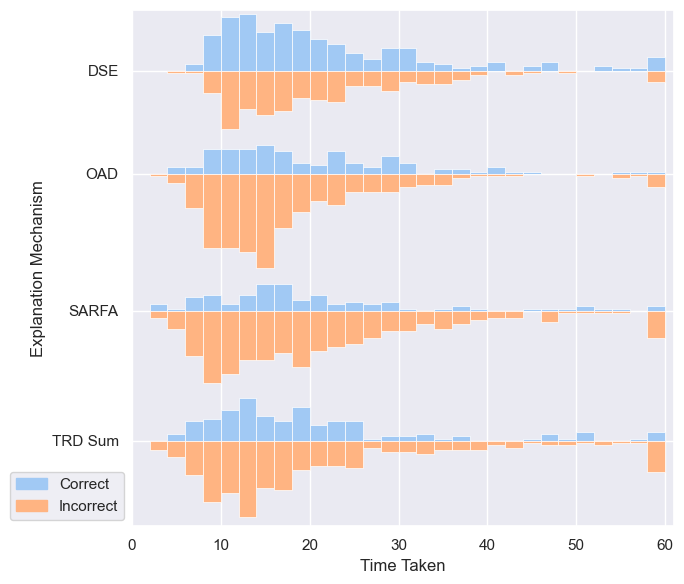

In [12]:
strategy_id_answers_df["Explanation Mechanism"] = strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "TemporalDecomposition": "TRD Sum", "SARFA": "SARFA", "OptimalAction": "OAD"})
fig, ax = plt.subplots(figsize=(7, 6))
width = 2
colours = sns.color_palette("pastel")
pos = 25
tick_pos = []
mechanisms = []
for mechanism, time_taken in strategy_id_answers_df.groupby("Explanation Mechanism")[["Time Taken", "is_correct"]]:
    y, x = np.histogram(time_taken[time_taken["is_correct"] == True]["Time Taken"], bins=np.arange(0, 60 + width, width))
    x = [(a+x[i+1])/2.0 for i, a in enumerate(x[:-1])]
    hist = pd.Series(y, x)
    max_correct_y = np.max(y)
    ax.bar(hist.index, hist.values, width=width, align='center', linewidth=0.5, bottom=pos - max_correct_y, color=colours[0], label="Correct")
    
    y, x = np.histogram(time_taken[time_taken["is_correct"] == False]["Time Taken"], bins=np.arange(0, 60 + width, width))
    x = [(a+x[i+1])/2.0 for i, a in enumerate(x[:-1])]
    hist = pd.Series(-y, x)
    ax.bar(hist.index, hist.values, width=width, align='center', linewidth=0.5, bottom=pos - max_correct_y, color=colours[1], label="Incorrect")
    max_incorrect_y = np.max(y)
    
    tick_pos.append(pos - max_correct_y)
    mechanisms.append(mechanism)
    pos -= max_correct_y + max_incorrect_y + 7
ax.set_yticks(tick_pos, mechanisms)
ax.set_xlabel("Time Taken")
ax.set_ylabel("Explanation Mechanism")
ax.legend(handles=[matplotlib.patches.Patch(color=c, label=l) for c, l in zip(colours, ["Correct", "Incorrect"])], bbox_to_anchor=(0, 0.12))
ax.set_xlim(left=0, right=61)
print(f'{tick_pos}')
ax.set_ylim(bottom=-203, top=27)
plt.tight_layout()
plt.savefig('figs/mechanism-accuracy-time.png', bbox_inches='tight')
plt.savefig('figs/mechanism-accuracy-time.pdf', bbox_inches='tight')

In [13]:
for mechanism, time_taken in strategy_id_answers_df.groupby("Explanation Mechanism")[["Time Taken", "is_correct"]]:
    correct_time_taken = time_taken[time_taken["is_correct"] == True]["Time Taken"].values
    incorrect_time_taken = time_taken[time_taken["is_correct"] == False]["Time Taken"].values
    
    ks_stat, ks_p_value = stats.ks_2samp(correct_time_taken, incorrect_time_taken)
    # anderson_result = stats.anderson_ksamp([correct_time_taken, incorrect_time_taken])
    print(f"{mechanism} - Number of correct: {len(correct_time_taken)}, incorrect: {len(incorrect_time_taken)}, "
          f"ks stats: {ks_stat:.3f}, p-value: {ks_p_value:.3f}")

DSE - Number of correct: 213, incorrect: 187, ks stats: 0.055, p-value: 0.900
OAD - Number of correct: 115, incorrect: 285, ks stats: 0.158, p-value: 0.029
SARFA - Number of correct: 91, incorrect: 309, ks stats: 0.086, p-value: 0.632
TRD Sum - Number of correct: 140, incorrect: 260, ks stats: 0.064, p-value: 0.819


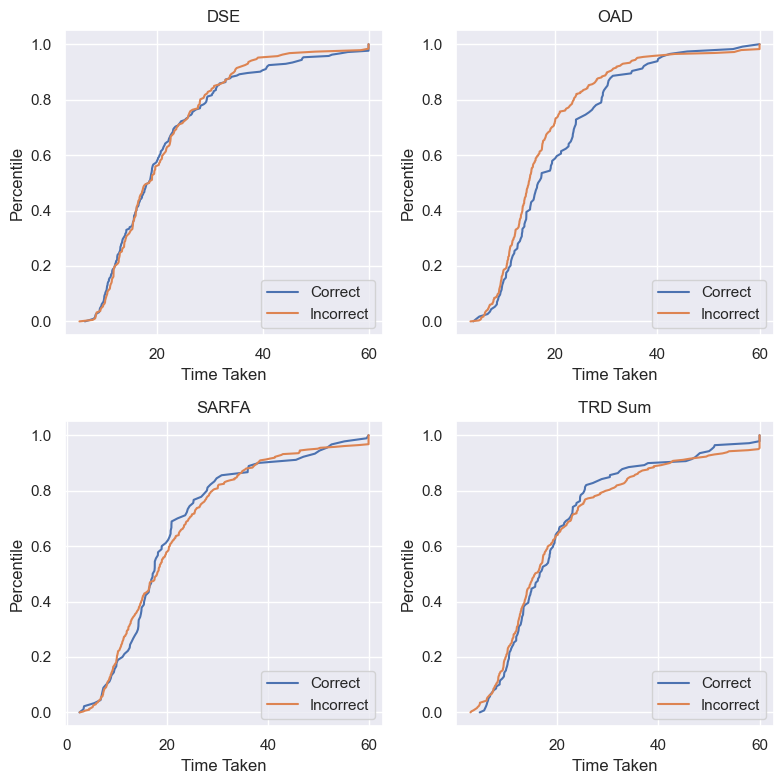

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for ax, (mechanism, time_taken) in zip(axs.flatten(), strategy_id_answers_df.groupby("Explanation Mechanism")[["Time Taken", "is_correct"]]):
    correct_time_taken = np.sort(time_taken[time_taken["is_correct"] == True]["Time Taken"].values)
    incorrect_time_taken = np.sort(time_taken[time_taken["is_correct"] == False]["Time Taken"].values)
    
    ax.set_title(mechanism)
    ax.plot(correct_time_taken, np.linspace(0, 1, len(correct_time_taken)), label="Correct")
    ax.plot(incorrect_time_taken, np.linspace(0, 1, len(incorrect_time_taken)), label="Incorrect")
    ax.set_ylabel("Percentile")
    ax.set_xlabel("Time Taken")
    ax.legend(loc="lower right")
plt.tight_layout()
plt.savefig('figs/mechanism-accuracy-time-cdf.png', bbox_inches='tight')
plt.savefig('figs/mechanism-accuracy-time-cdf.pdf', bbox_inches='tight')

In [39]:
for mechanism, time_taken in strategy_id_answers_df.groupby("Explanation Mechanism")["Time Taken"]:
    print(f'{mechanism: <30} - {time_taken.quantile([0.1, 0.25, 0.5, 0.75, 0.9]).values.round(2)}')

DSE                            - [10.34 12.94 18.47 26.3  35.13]
OAD                            - [ 9.07 11.34 15.32 23.39 31.28]
SARFA                          - [ 7.95 11.26 17.52 26.49 38.13]
TRD Sum                        - [ 8.1  11.17 16.37 24.59 42.34]


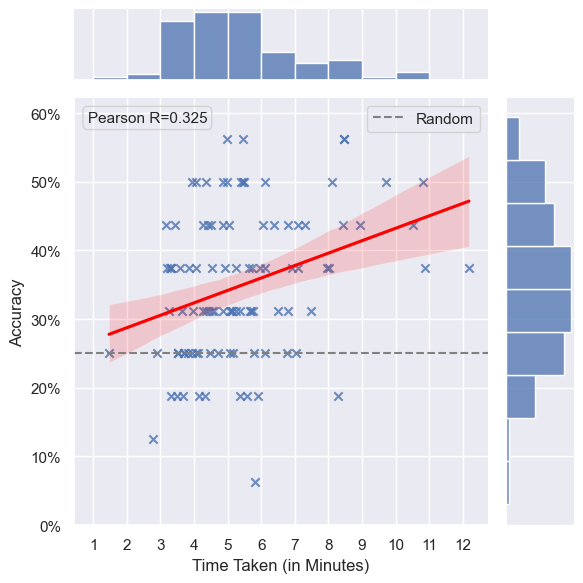

In [79]:
strategy_id_answers_df["Time Taken"] = strategy_id_answers_df["time_taken"].clip(upper=60)
# ax = sns.scatterplot(strategy_id_answers_df.groupby(["user_id"]).agg({"Time Taken": "sum", "Accuracy": "sum"}), x="Time Taken", y="Accuracy")
# ax = sns.scatterplot(strategy_id_answers_df.groupby(["user_id"]).agg({"Time Taken": "sum", "Accuracy": "mean"}), x="Time Taken", y="Accuracy", marker="x")
ax = sns.JointGrid()
sns.regplot(strategy_id_answers_df.groupby(["user_id"]).agg({"Time Taken": "sum", "Accuracy": "mean"}), x="Time Taken", y="Accuracy", marker="x", line_kws=dict(color="red"), ax=ax.ax_joint)
sns.histplot(strategy_id_answers_df.groupby(["user_id"]).agg({"Time Taken": "sum", "Accuracy": "mean"}), x="Time Taken", bins=np.linspace(60, 12*60, 12), ax=ax.ax_marg_x)
sns.histplot(strategy_id_answers_df.groupby(["user_id"]).agg({"Time Taken": "sum", "Accuracy": "mean"}), y="Accuracy", bins=np.linspace(0, 0.5625, 10) + 1/32, ax=ax.ax_marg_y)
ax.ax_joint.set_yticks(np.linspace(0, 0.6, 7), [f'{int(x)}%' for x in np.linspace(0, 60, 7)])
ax.ax_joint.set_xticks(np.linspace(60, 720, 12), [f'{int(x)}' for x in np.linspace(1, 12, 12)])
ax.ax_joint.set_xlabel("Time Taken (in Minutes)")
ax.ax_joint.axhline(0.25, linestyle='--', color="gray", label="Random")
ax.ax_joint.legend()
df = strategy_id_answers_df.groupby(["user_id"]).agg({"Time Taken": "sum", "Accuracy": "mean"})
ax.ax_joint.text(50, .587, f'Pearson R={stats.pearsonr(df["Time Taken"], df["Accuracy"]).statistic:4.3f}', fontdict={"fontsize": 11}, bbox=dict(boxstyle='round', fill=None, edgecolor='lightgrey'))
plt.tight_layout()
plt.savefig('figs/user-accuracy-time-taken.pdf')
plt.savefig('figs/user-accuracy-time-taken.png')

# Is there a learning effect over time? Does the average user accuracy increase over time? 

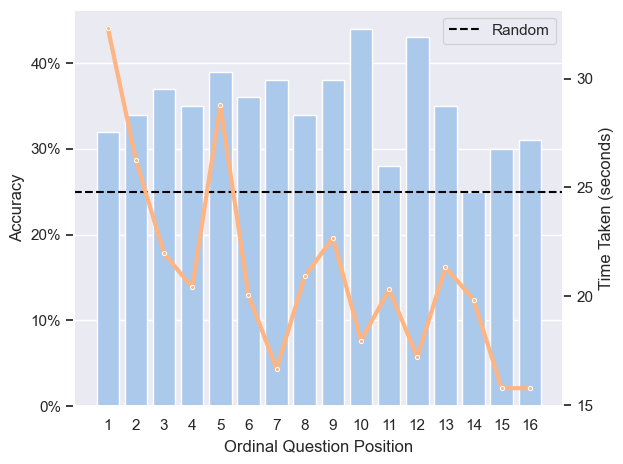

In [72]:
ax = sns.barplot(strategy_id_answers_df.groupby(["survey_question_pos"])["is_correct"].mean().to_frame("Accuracy").reset_index(), x="survey_question_pos", y="Accuracy", color=colours[0])
ax.axhline(0.25, linestyle="--", color="black", label="Random")
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4], ["0%", "10%", "20%", "30%", "40%"])
ax.set_xlabel("Ordinal Question Position")
ax.set_xticks(np.arange(0, 16), np.arange(1, 17))

ax_y = ax.twinx()
sns.lineplot(strategy_id_answers_df.groupby(["survey_question_pos"])["time_taken"].mean().to_frame("Time Taken").reset_index(), x="survey_question_pos", y="Time Taken", ax=ax_y, color=colours[1], marker=".", linewidth=3)
ax_y.grid(False)
ax_y.set_yticks(np.linspace(15, 30, 4), np.linspace(15, 30, 4, dtype=int))
ax_y.set_ylabel("Time Taken (seconds)")

ax.legend()
plt.tight_layout()
plt.savefig('figs/question-pos.png')
plt.savefig('figs/question-pos.pdf')

In [42]:
strategy_id_answers_df.groupby("survey_question_pos")["is_correct"].mean()

survey_question_pos
0     0.32
1     0.34
2     0.37
3     0.35
4     0.39
5     0.36
6     0.38
7     0.34
8     0.38
9     0.44
10    0.28
11    0.43
12    0.35
13    0.25
14    0.30
15    0.31
Name: is_correct, dtype: float64

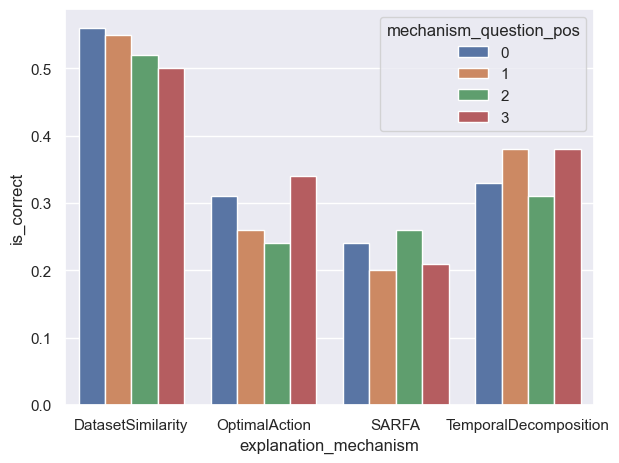

In [43]:
strategy_id_answers_df["mechanism_question_pos"] = strategy_id_answers_df["survey_question_pos"] % 4
sns.barplot(strategy_id_answers_df.groupby(["explanation_mechanism", "mechanism_question_pos"])["is_correct"].mean().to_frame("is_correct").reset_index(), hue="mechanism_question_pos", y="is_correct", x="explanation_mechanism")
plt.tight_layout()
plt.savefig('figs/mechanism-question-pos-accuracy.png')
plt.savefig('figs/mechanism-question-pos-accuracy.pdf')

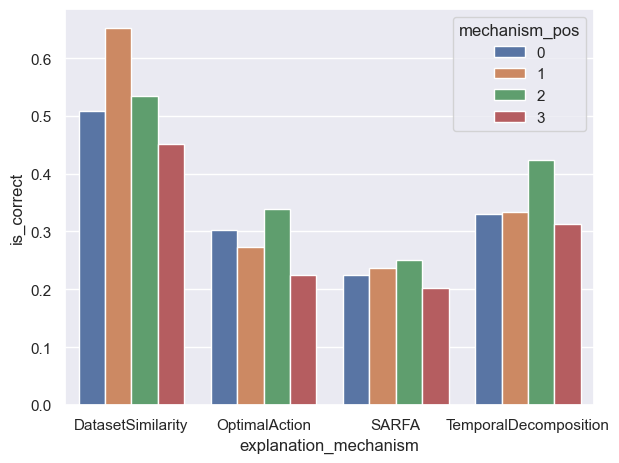

In [44]:
strategy_id_answers_df["mechanism_pos"] = strategy_id_answers_df["survey_question_pos"] // 4
sns.barplot(strategy_id_answers_df.groupby(["explanation_mechanism", "mechanism_pos"])["is_correct"].mean().to_frame("is_correct").reset_index(), hue="mechanism_pos", y="is_correct", x="explanation_mechanism")
plt.tight_layout()
plt.savefig('figs/mechanism-pos-accuracy.png')
plt.savefig('figs/mechanism-pos-accuracy.pdf')

## Relative User Difficulty

In [45]:
difficulty_df = strategy_id_answers_df.groupby(["explanation_mechanism", "true_strategy"])["is_correct"].mean().reset_index(name="difficulty")
difficulty_df["difficulty"] = 1 - difficulty_df["difficulty"]

df = pd.merge(strategy_id_answers_df, difficulty_df, on=["explanation_mechanism", "true_strategy"])
df

,user_id,obs_id,explanation_mechanism,true_strategy,predicted_strategy,is_correct,confidence,time_taken,survey_question_pos,Explanation Mechanism,Accuracy,Agent Strategy,Predicted Strategy,obs_source,obs_source_strategy,Time Taken,mechanism_question_pos,mechanism_pos,difficulty
0,16,15,DatasetSimilarity,EnergyPill,EnergyPill,True,Confident,11.485,14,DSE,True,Eat EPaG,Eat EPaG,3,Survival,11.485,2,3,0.310000
1,18,6,DatasetSimilarity,EnergyPill,EnergyPill,True,Very Unconfident,17.693,7,DSE,True,Eat EPaG,Eat EPaG,1,Eat Dots,17.693,3,1,0.310000
2,20,10,DatasetSimilarity,EnergyPill,EnergyPill,True,Neutral,23.240,14,DSE,True,Eat EPaG,Eat EPaG,2,Eat EPaG,23.240,2,3,0.310000
3,22,2,DatasetSimilarity,EnergyPill,EnergyPill,True,Confident,28.235,3,DSE,True,Eat EPaG,Eat EPaG,0,NaN,28.235,3,0,0.310000
4,26,9,DatasetSimilarity,EnergyPill,Dots,False,Neutral,11.975,11,DSE,False,Eat EPaG,Eat Dots,2,Eat EPaG,11.975,3,2,0.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,112,7,OptimalAction,EnergyPill,Dots,False,Confident,22.649,5,OAD,False,Eat EPaG,Eat Dots,1,Eat Dots,22.649,1,1,0.816327
1596,114,0,OptimalAction,EnergyPill,EnergyPill,True,Confident,29.598,11,OAD,True,Eat EPaG,Eat EPaG,0,NaN,29.598,3,2,0.816327
1597,117,13,OptimalAction,EnergyPill,Dots,False,Confident,6.674,14,OAD,False,Eat EPaG,Eat Dots,3,Survival,6.674,2,3,0.816327
1598,118,16,OptimalAction,EnergyPill,Dots,False,Unconfident,65.513,9,OAD,False,Eat EPaG,Eat Dots,4,Lose a Life,60.000,1,2,0.816327


In [46]:
expected_scores = df.groupby(["user_id", "explanation_mechanism", "true_strategy"])["difficulty"].apply(lambda x: (1 - x).sum()).reset_index(name="expected_score")
actual_scores = df.groupby(["user_id", "explanation_mechanism", "true_strategy"])["is_correct"].sum().reset_index(name="actual_score")

performance_df = pd.merge(expected_scores, actual_scores, on=["user_id", "explanation_mechanism", "true_strategy"])
performance_df["relative_performance"] = performance_df["actual_score"] / performance_df["expected_score"]
performance_df

,user_id,explanation_mechanism,true_strategy,expected_score,actual_score,relative_performance
0,16,DatasetSimilarity,EnergyPill,0.690000,1,1.449275
1,16,DatasetSimilarity,LoseALife,0.445545,1,2.244444
2,16,DatasetSimilarity,Survival,1.160000,1,0.862069
3,16,OptimalAction,Dots,0.490196,1,2.040000
4,16,OptimalAction,LoseALife,0.260000,0,0.000000
...,...,...,...,...,...,...
1103,122,SARFA,LoseALife,0.160000,1,6.250000
1104,122,SARFA,Survival,0.818182,1,1.222222
1105,122,TemporalDecomposition,Dots,0.310000,0,0.000000
1106,122,TemporalDecomposition,EnergyPill,0.319588,0,0.000000


<Axes: xlabel='user_performance', ylabel='Count'>

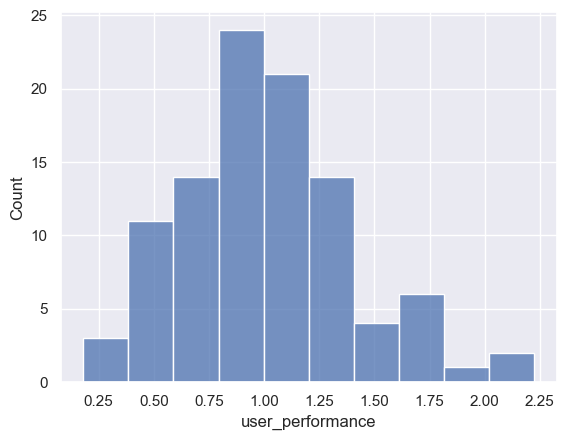

In [47]:
sns.histplot(performance_df.groupby("user_id")["relative_performance"].mean().to_frame("user_performance"), x="user_performance")

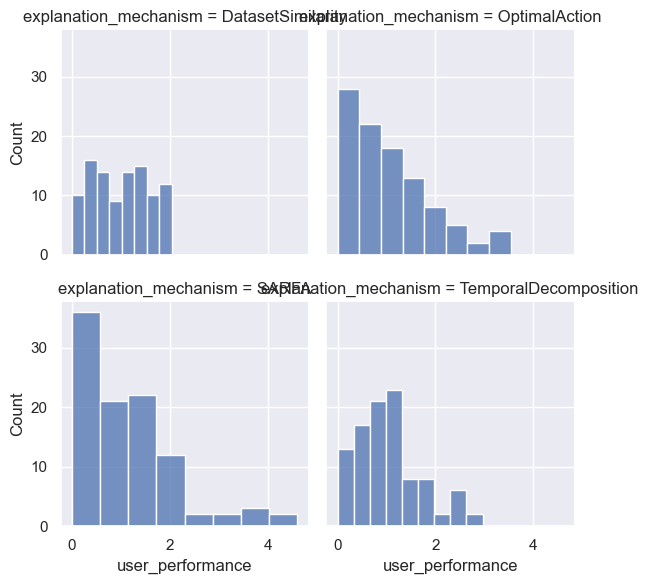

In [48]:
g = sns.FacetGrid(performance_df.groupby(["user_id", "explanation_mechanism"])["relative_performance"].mean().to_frame("user_performance").reset_index(), col="explanation_mechanism", col_wrap=2)
g.map(sns.histplot, "user_performance")


# Expert Participant

In [5]:
expert_strategy_id_answers_df = pd.read_csv('strategy-identification+all_13+December+2024_15.59-strategy-id-answers.csv')
expert_strategy_id_answers_df

,user_id,obs_id,explanation_mechanism,true_strategy,predicted_strategy,is_correct,confidence,time_taken,survey_question_pos
0,2,0,DatasetSimilarity,Dots,Dots,True,Very Confident,33.507,169
1,2,1,DatasetSimilarity,Dots,Dots,True,Confident,13.153,232
2,2,2,DatasetSimilarity,Dots,Dots,True,Confident,9.791,236
3,2,3,DatasetSimilarity,Dots,Dots,True,Confident,8.285,210
4,2,4,DatasetSimilarity,Dots,Dots,True,Confident,12.636,196
...,...,...,...,...,...,...,...,...,...
315,2,15,OptimalAction,LoseALife,Dots,False,Confident,20.149,66
316,2,16,OptimalAction,LoseALife,Survival,False,Confident,8.387,67
317,2,17,OptimalAction,LoseALife,EnergyPill,False,Neutral,11.456,27
318,2,18,OptimalAction,LoseALife,EnergyPill,False,Neutral,10.726,12


In [7]:
expert_strategy_id_answers_df["Explanation Mechanism"] = expert_strategy_id_answers_df["explanation_mechanism"].map({"DatasetSimilarity": "DSE", "TemporalDecomposition": "TRD Sum", "SARFA": "SARFA", "OptimalAction": "OAD"})
expert_strategy_id_answers_df["Accuracy"] = expert_strategy_id_answers_df["is_correct"]
expert_strategy_id_answers_df["Agent Strategy"] = expert_strategy_id_answers_df["true_strategy"].map({"Dots": "Eat Dots", "EnergyPill": "Eat EPaG", "LoseALife": "Lose a Life", "Survival": "Survival"})
expert_strategy_id_answers_df["Predicted Strategy"] = expert_strategy_id_answers_df["predicted_strategy"].map({"Dots": "Eat Dots", "EnergyPill": "Eat EPaG", "LoseALife": "Lose a Life", "Survival": "Survival"})

In [16]:
expert_strategy_id_answers_df.groupby(by="explanation_mechanism")["is_correct"].mean().apply(lambda x: np.round(x*100, 1))

explanation_mechanism
DatasetSimilarity        77.5
OptimalAction            25.0
SARFA                    17.5
TemporalDecomposition    97.5
Name: is_correct, dtype: float64

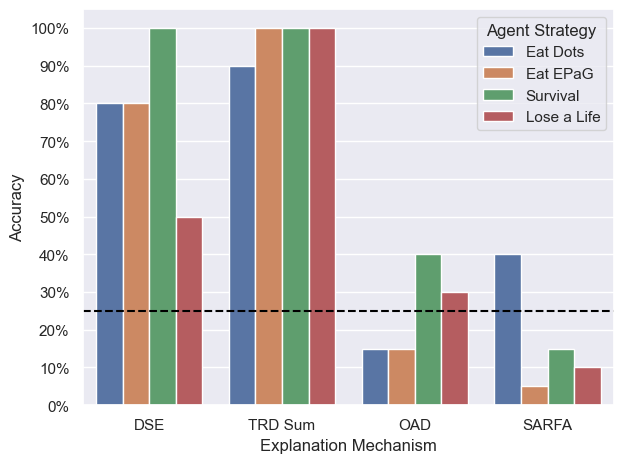

In [9]:
ax = sns.barplot(data=expert_strategy_id_answers_df.sort_values(["Explanation Mechanism", "Agent Strategy"], key=lambda x: x.map({"DSE": 1, "TRD Sum": 2, "OAD": 3, "SARFA": 4, "Eat Dots": 1, "Eat EPaG": 2, "Survival": 3, "Lose a Life": 4})), x="Explanation Mechanism", y="Accuracy", hue="Agent Strategy", errorbar=None)
ax.axhline(y=0.25, label="Random", linestyle="--", color="black")
ax.set_yticks(np.linspace(0, 1, 11), [f'{int(x)}%' for x in np.linspace(0, 100, 11)])
plt.tight_layout()
plt.savefig("figs/expert-mechanism-goal-accuracy.png")
plt.savefig("figs/expert-mechanism-goal-accuracy.pdf")

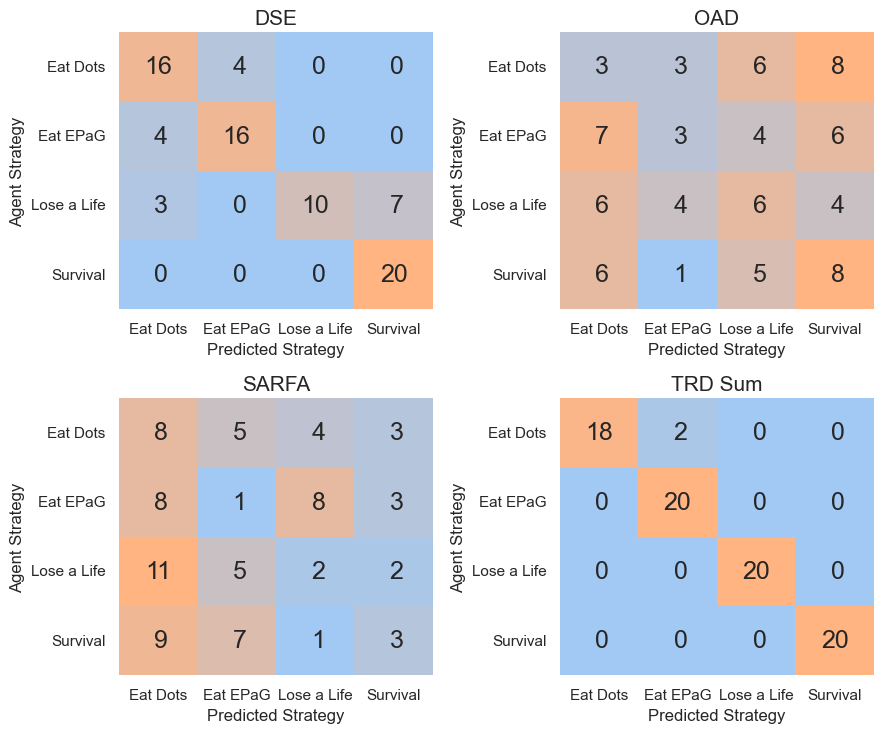

In [14]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("Custom", sns.color_palette("pastel")[:2], N=20)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 7.5))
for ax, (mechanism, mechanism_df) in zip(axs.flatten(), expert_strategy_id_answers_df.groupby("Explanation Mechanism")):
    sns.heatmap(pd.pivot_table(mechanism_df.groupby(by=["Agent Strategy", "Predicted Strategy"]).size().to_frame("Count").reset_index(level=[0, 1]), index="Agent Strategy", columns="Predicted Strategy", values="Count", fill_value=0), 
                ax=ax, annot=True, annot_kws={"size": 18}, fmt="2d", cmap=cmap, cbar=False)
    ax.set_title(mechanism, fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
plt.tight_layout()
plt.savefig('figs/expert-mechanism-confusion-matrix.png')
plt.savefig('figs/expert-mechanism-confusion-matrix.pdf')

## OAD Same Explanation? 

In [59]:
import json

with open("../explanations/optimal_action_explanation.json") as file:
    explanations = json.load(file)
    
strategies = {"Dots": ["EnergyPill", "Survival", "LoseALife"], 
              "EnergyPill": ["Dots", "Survival", "LoseALife"],
              "Survival": ["Dots", "EnergyPill", "LoseALife"],
              "LoseALife": ["Dots", "EnergyPill", "Survival"]}
for obs_id in range(20):
    if any(explanations[f"obs-{obs_id}-{strategy}-v2"] in [explanations[f"obs-{obs_id}-{other_strategy}-v2"] for other_strategy in other_strategies] 
           for strategy, other_strategies in strategies.items()):
        print(f"{obs_id} -", [explanations[f"obs-{obs_id}-{strategy}-v2"] in [explanations[f"obs-{obs_id}-{other_strategy}-v2"] for other_strategy in other_strategies] for strategy, other_strategies in strategies.items()])

0 - [True, False, True, False]
3 - [True, False, True, False]
7 - [True, True, False, False]
9 - [True, False, True, False]
10 - [False, True, True, False]
11 - [True, False, True, False]
12 - [True, False, True, False]
15 - [False, False, True, True]
18 - [False, True, True, False]
